In [26]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [9]:
# Create a DataFrame with 10 columns and 300 rows
np.random.seed(0)
data = np.random.randn(300, 10)

# Introduce missing values in one column
data[:, 0] = np.where(np.random.rand(300) < 0.1, np.nan, data[:, 0])

# Convert to DataFrame
data = pd.DataFrame(data, columns=[f'Col_{i+1}' for i in range(10)])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Col_1   266 non-null    float64
 1   Col_2   300 non-null    float64
 2   Col_3   300 non-null    float64
 3   Col_4   300 non-null    float64
 4   Col_5   300 non-null    float64
 5   Col_6   300 non-null    float64
 6   Col_7   300 non-null    float64
 7   Col_8   300 non-null    float64
 8   Col_9   300 non-null    float64
 9   Col_10  300 non-null    float64
dtypes: float64(10)
memory usage: 23.6 KB


In [12]:
data.isnull().sum()

Col_1     34
Col_2      0
Col_3      0
Col_4      0
Col_5      0
Col_6      0
Col_7      0
Col_8      0
Col_9      0
Col_10     0
dtype: int64

null value imputation using mean

In [13]:
mean = data['Col_1'].mean()
print(mean)

-0.10520982394460712


In [14]:
data['Col_1'] = data['Col_1'].fillna(mean)

In [15]:
data.isnull().sum()

Col_1     0
Col_2     0
Col_3     0
Col_4     0
Col_5     0
Col_6     0
Col_7     0
Col_8     0
Col_9     0
Col_10    0
dtype: int64

<Axes: ylabel='Density'>

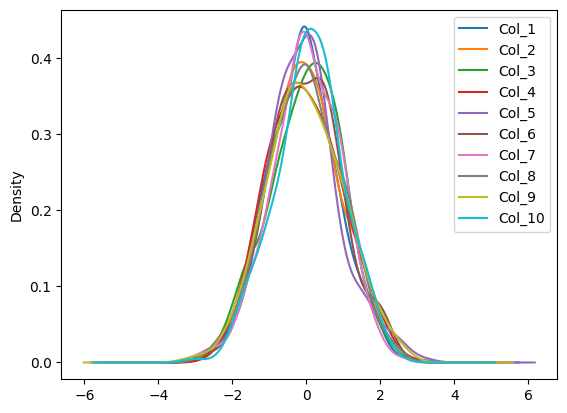

In [19]:
data.plot(kind='kde')

Task1: preprocessing like scaling

In [16]:
scaler = StandardScaler()
inp_sc = scaler.fit_transform(data)

Task2: Computing principle components

In [22]:
pca = PCA()
pca_data = pca.fit_transform(inp_sc)

Task3: Analyzing the explained variance with n number of components

In [23]:
exp_var = pca.explained_variance_ratio_
exp_var

array([0.12750543, 0.1239034 , 0.11704337, 0.11396038, 0.0986261 ,
       0.09414005, 0.09262702, 0.08406785, 0.07826495, 0.06986145])

In [24]:
# explained variance of top 4 principal components in percentage
exp_var = exp_var[:4]
exp_var = exp_var*100
exp_var

array([12.75054306, 12.39034017, 11.70433714, 11.39603785])

Task4: Building and evaluating clustering model with top PC

In [28]:
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(pca_data[:, :4])

In [29]:
sil_score = silhouette_score(pca_data[:, :4], cluster_labels)
print(sil_score)

0.18068050734038654


Visualize top 2 PCA

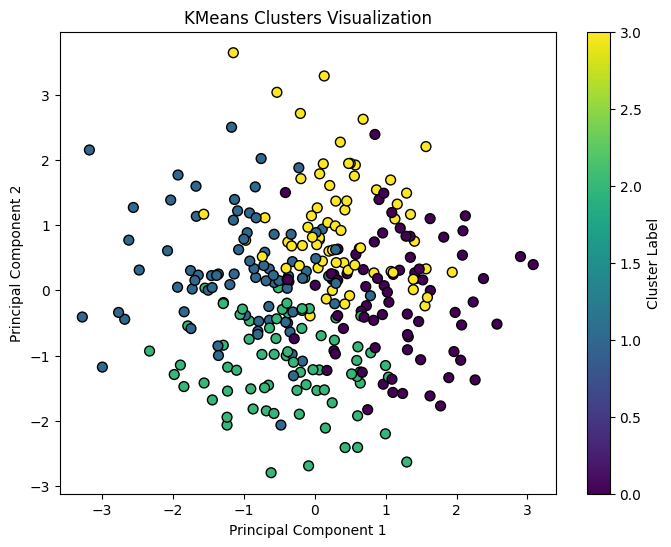

In [36]:
import matplotlib.pyplot as plt

top2 = pca_data[:, :2]
pc1 = top2[:,0]
pc2 = top2[:,1]
plt.figure(figsize=(8, 6))
plt.scatter(x=pc1, y=pc2, c=cluster_labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('KMeans Clusters Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()